In [3]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
# import warnings; 
# warnings.filterwarnings('ignore')

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy
# 使用沙盒数据，目的是和书中一样的数据环境
abupy.env.enable_example_env_ipython()

enable example env will only read RomDataBu/csv


In [9]:
print(sys.version)

3.6.0 |Anaconda 4.3.1 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


# 第5章 量化工具-可视化

[abu量化系统github地址](https://github.com/bbfamily/abu) (您的star是我的动力！)

[abu量化文档教程ipython notebook](https://github.com/bbfamily/abu/tree/master/abupy_lecture)

## 5.1 使用matplotlib可视化数据

### 5.1.1 matplotlib可视化基础

In [1]:
from abupy import ABuSymbolPd
tsla_df = ABuSymbolPd.make_kl_df('usTSLA', n_folds=2)
tsla_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,atr21,atr14,key
2017-12-15,343.45,343.90,335.76,1.646,342.04,337.89,6933199,20171215,4,12.1579,12.4055,498
2017-12-18,338.87,346.73,337.58,-1.334,344.90,343.45,5476166,20171218,0,11.8845,11.9715,499
2017-12-19,331.10,341.49,330.30,-2.293,340.26,338.87,6824971,20171219,1,11.9995,12.1286,500
2017-12-20,328.98,333.10,325.04,-0.640,332.69,331.10,5953800,20171220,2,12.1659,12.3555,501
2017-12-21,331.57,331.68,329.01,0.787,329.60,328.98,2644,20171221,3,11.3027,11.0641,502


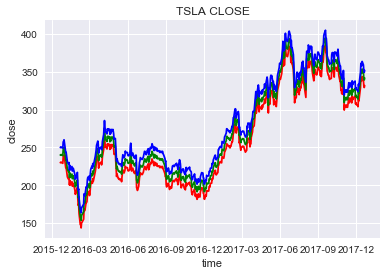

In [5]:
import matplotlib.pyplot as plt
figzize_me = figsize =(14, 7)
def plot_demo(axs=None, just_series=False):
    """
    绘制tsla的收盘价格曲线
    :param axs: axs为子画布，稍后会详细讲解
    :param just_series: 是否只绘制一条收盘曲线使用series，后面会用到
    :return: 
    """
    # 如果参数传入子画布则使用子画布绘制，下一节会使用
    drawer = plt if axs is None else axs
    # Series对象tsla_df.close，红色
    drawer.plot(tsla_df.close, c='r')
    if not just_series:
        # 为曲线不重叠，y变量加了10个单位tsla_df.close.values + 10
        # numpy对象tsla_df.close.index ＋ tsla_df.close.values，绿色
        drawer.plot(tsla_df.close.index, tsla_df.close.values + 10,
                    c='g')
        # 为曲线不重叠，y变量加了20个单位
        # list对象，numpy.tolist()将numpy对象转换为list对象，蓝色
        drawer.plot(tsla_df.close.index.tolist(),
                    (tsla_df.close.values + 20).tolist(), c='b')

    plt.xlabel('time')
    plt.ylabel('close')
    plt.title('TSLA CLOSE')
    plt.grid(True)

plot_demo()

### 5.1.2 matplotlib子画布及loc的使用

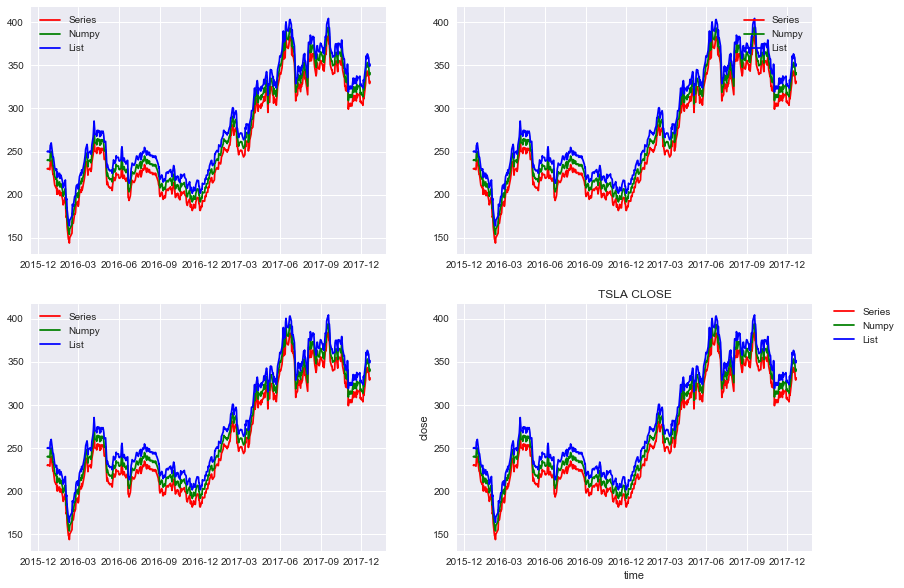

In [7]:
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# 画布0，loc：0 plot_demo中传入画布，则使用传入的画布绘制
drawer = axs[0][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc=0)
# 画布1，loc：1 
drawer = axs[0][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc=1)
# 画布2，loc：2 
drawer = axs[1][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc=2)
# 画布3，loc：2， 设置bbox_to_anchor，在画布外的相对位置绘制
drawer = axs[1][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], bbox_to_anchor=(1.05, 1),
              loc=2,
              borderaxespad=0.);

### 5.1.3 k线图的绘制

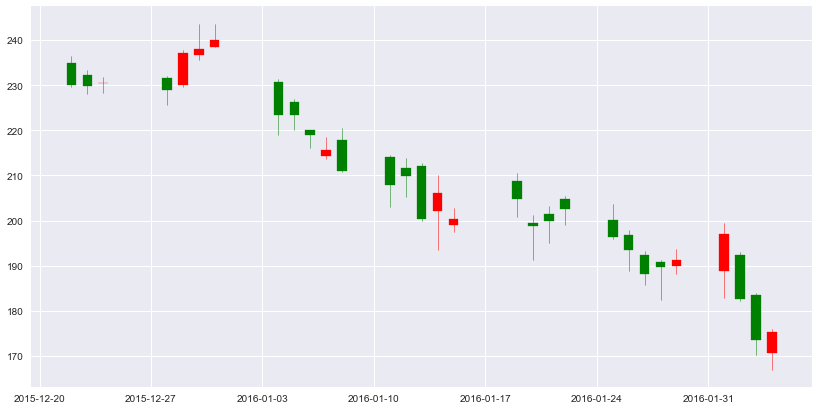

In [8]:
import matplotlib.finance as mpf

__colorup__ = "red"
__colordown__ = "green"
# 为了示例清晰，只拿出前30天的交易数据绘制蜡烛图，
tsla_part_df = tsla_df[:30]
fig, ax = plt.subplots(figsize=(14, 7))
qutotes = []

for index, (d, o, c, h, l) in enumerate(
        zip(tsla_part_df.index, tsla_part_df.open, tsla_part_df.close,
            tsla_part_df.high, tsla_part_df.low)):
    # 蜡烛图的日期要使用matplotlib.finance.date2num进行转换为特有的数字值
    d = mpf.date2num(d)
    # 日期，开盘，收盘，最高，最低组成tuple对象val
    val = (d, o, c, h, l)
    # 加val加入qutotes
    qutotes.append(val)
# 使用mpf.candlestick_ochl进行蜡烛绘制，ochl代表：open，close，high，low
mpf.candlestick_ochl(ax, qutotes, width=0.6, colorup=__colorup__,
                     colordown=__colordown__)
ax.autoscale_view()
ax.xaxis_date()

## 5.2 使用bokeh交互可视化

In [14]:
from abupy import ABuMarketDrawing
ABuMarketDrawing.plot_candle_form_klpd(tsla_df, html_bk=True)

## 5.3 使用pandas可视化数据
### 5.3.1 绘制股票的收益，及收益波动情况

In [15]:
from abupy import pd_rolling_std
# 示例序列
demo_list = np.array([2, 4, 16, 20])
# 以三天为周期计算波动
demo_window = 3
# pd.rolling_std(demo_list, window=demo_window, center=False) * np.sqrt(demo_window)
pd_rolling_std(demo_list, window=demo_window, center=False) * np.sqrt(demo_window)

array([         nan,          nan,  13.11487705,  14.4222051 ])

In [16]:
pd.Series([2, 4, 16]).std() * np.sqrt(demo_window)

13.114877048604002

In [17]:
pd.Series([4, 16, 20]).std() * np.sqrt(demo_window)

14.422205101855958

In [18]:
np.sqrt(pd.Series([2, 4, 16]).var() *  demo_window)

13.114877048604002

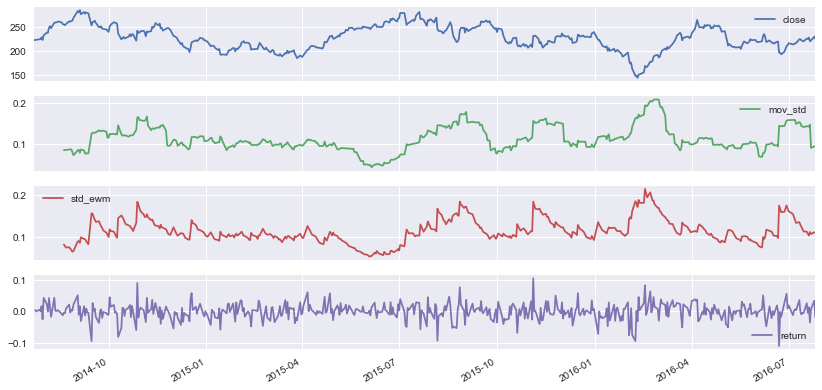

In [19]:
from abupy import pd_rolling_std, pd_ewm_std
tsla_df_copy = tsla_df.copy()
# 投资回报
tsla_df_copy['return'] = np.log(tsla_df['close'] / tsla_df['close'].shift(1))

# 移动收益标准差
tsla_df_copy['mov_std'] = pd_rolling_std(tsla_df_copy['return'],
                                         window=20,
                                         center=False) * np.sqrt(20)
# 加权移动收益标准差，与移动收益标准差基本相同，只不过根据时间权重计算std
tsla_df_copy['std_ewm'] = pd_ewm_std(tsla_df_copy['return'], span=20,
                                    min_periods=20,
                                    adjust=True) * np.sqrt(20)

tsla_df_copy[['close', 'mov_std', 'std_ewm', 'return']].plot(subplots=True, grid=True);

### 5.3.2 绘制股票的价格与均线

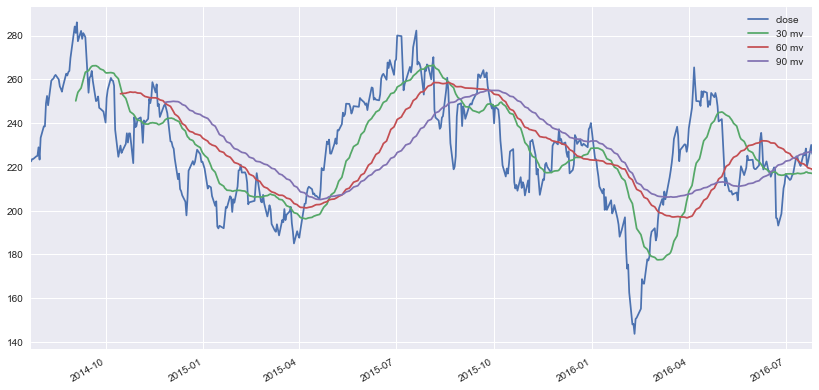

In [20]:
from abupy import pd_rolling_mean
tsla_df.close.plot()
# ma 30
# pd.rolling_mean(tsla_df.close, window=30).plot()
pd_rolling_mean(tsla_df.close, window=30).plot()
# ma 60
# pd.rolling_mean(tsla_df.close, window=60).plot()
pd_rolling_mean(tsla_df.close, window=60).plot()
# ma 90
# pd.rolling_mean(tsla_df.close, window=90).plot()
pd_rolling_mean(tsla_df.close, window=90).plot()
# loc='best'即自动寻找适合的位置
plt.legend(['close', '30 mv', '60 mv', '90 mv'], loc='best');

### 5.3.3 其它pandas统计图形种类

In [21]:
# iloc获取所有低开高走的下一个交易日组成low_to_high_df，由于是下一个交易日
# 所以要对满足条件的交易日再次通过iloc获取，下一个交易日index用key.values + 1
# key序列的值即为0-len(tsla_df), 即为交易日index，详情查阅本章初tail
low_to_high_df = tsla_df.iloc[tsla_df[
                                  (tsla_df.close > tsla_df.open) & (
                                  tsla_df.key != tsla_df.shape[0] - 1)].key.values + 1]

# 通过where将下一个交易日的涨跌幅通过ceil，floor向上，向下取整
change_ceil_floor = np.where(low_to_high_df['p_change'] > 0,
                             np.ceil(
                                 low_to_high_df['p_change']),
                             np.floor(
                                 low_to_high_df['p_change']))

# 使用pd.Series包裹，方便之后绘制
change_ceil_floor = pd.Series(change_ceil_floor)

低开高收的下一个交易日所有下跌的跌幅取整和sum: -311.0
低开高收的下一个交易日所有上涨的涨幅取整和sum: 274.0


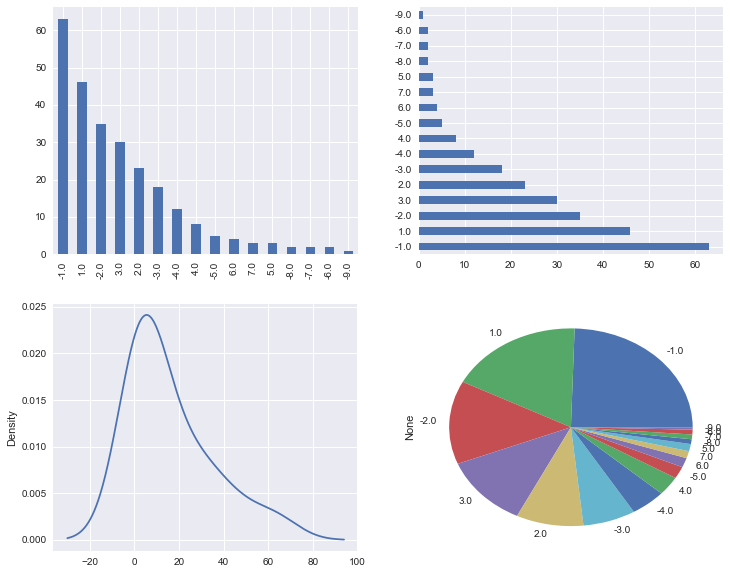

In [22]:
print('低开高收的下一个交易日所有下跌的跌幅取整和sum: ' + str(
change_ceil_floor[change_ceil_floor < 0].sum()))

print('低开高收的下一个交易日所有上涨的涨幅取整和sum: ' + str(
change_ceil_floor[change_ceil_floor > 0].sum()))

# 2 * 2: 四张子图
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# 竖直柱状图，可以看到-1的柱子最高, 图5-7左上
change_ceil_floor.value_counts().plot(kind='bar', ax=axs[0][0])
# 水平柱状图，可以看到-1的柱子最长, 图5-7右上
change_ceil_floor.value_counts().plot(kind='barh', ax=axs[0][1])
# 概率密度图，可以看到向左偏移, 图5-7左下
change_ceil_floor.value_counts().plot(kind='kde', ax=axs[1][0])
# 圆饼图，可以看到－1所占的比例最高, -2的比例也大于＋2，图5-7右下
change_ceil_floor.value_counts().plot(kind='pie', ax=axs[1][1]);

## 5.4 使用seaborn可视化数据

/Users/Bailey/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


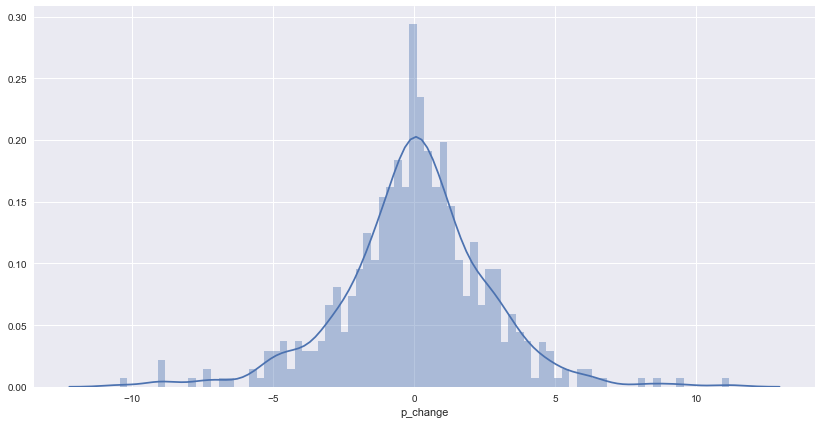

In [23]:
sns.distplot(tsla_df['p_change'], bins=80);

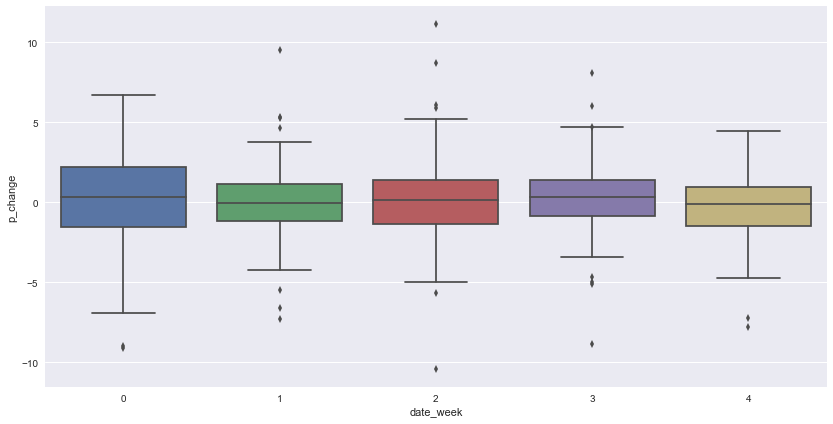

In [24]:
sns.boxplot(x='date_week', y='p_change', data=tsla_df);

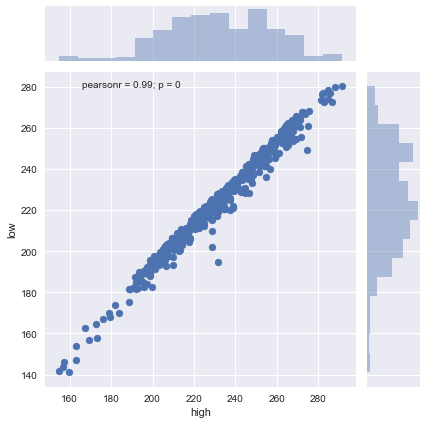

In [25]:
sns.jointplot(tsla_df['high'], tsla_df['low']);

In [26]:
change_df = pd.DataFrame({'tsla': tsla_df.p_change})
# join usGOOG
change_df = change_df.join(pd.DataFrame({'goog': ABuSymbolPd.make_kl_df('usGOOG', n_folds=2).p_change}),
                           how='outer')
# join usAAPL
change_df = change_df.join(pd.DataFrame({'aapl': ABuSymbolPd.make_kl_df('usAAPL', n_folds=2).p_change}),
                           how='outer')
# join usFB
change_df = change_df.join(pd.DataFrame({'fb': ABuSymbolPd.make_kl_df('usFB', n_folds=2).p_change}),
                           how='outer')
# join usBIDU
change_df = change_df.join(pd.DataFrame({'bidu': ABuSymbolPd.make_kl_df('usBIDU', n_folds=2).p_change}),
                           how='outer')

change_df = change_df.dropna()
# 表5-2所示
change_df.head()

,tsla,goog,aapl,fb,bidu
2014-07-25,0.01,-0.73,0.66,0.28,10.88
2014-07-28,0.56,0.27,1.38,-0.36,-0.31
2014-07-29,0.08,-0.84,-0.65,-1.62,-2.57
2014-07-30,1.74,0.31,-0.23,1.31,-0.40
2014-07-31,-2.45,-2.69,-2.60,-2.71,-1.41


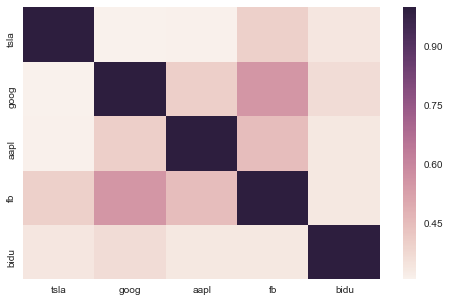

In [27]:
# 使用corr计算数据的相关性
corr = change_df.corr()
_, ax = plt.subplots(figsize=(8, 5))
# sns.heatmap热力图展示每组股票涨跌幅的相关性
sns.heatmap(corr, ax=ax);

## 5.5 实例1:可视化量化策略的交易区间，卖出原因

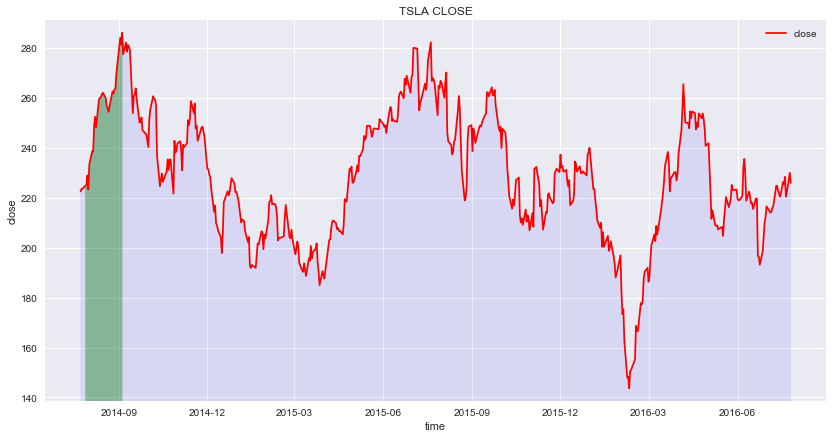

In [28]:
def plot_trade(buy_date, sell_date):
    # 找出2014-07-28对应时间序列中的index作为start
    start = tsla_df[tsla_df.index == buy_date].key.values[0]
    # 找出2014-09-05对应时间序列中的index作为end
    end = tsla_df[tsla_df.index == sell_date].key.values[0]
    
    # 使用5.1.1封装的绘制tsla收盘价格时间序列函数plot_demo
    # just_series＝True, 即只绘制一条曲线使用series数据
    plot_demo(just_series=True)

    # 将整个时间序列都填充一个底色blue，注意透明度alpha=0.08是为了
    # 之后标注其他区间透明度高于0.08就可以清楚显示
    plt.fill_between(tsla_df.index, 0, tsla_df['close'], color='blue',
                     alpha=.08)

    # 标注股票持有周期绿色，使用start和end切片周期
    # 透明度alpha=0.38 > 0.08
    plt.fill_between(tsla_df.index[start:end], 0,
                     tsla_df['close'][start:end], color='green',
                     alpha=.38)
    
    # 设置y轴的显示范围，如果不设置ylim，将从0开始作为起点显示，效果不好
    plt.ylim(np.min(tsla_df['close']) - 5,
             np.max(tsla_df['close']) + 5)
    # 使用loc='best'
    plt.legend(['close'], loc='best')

# 标注交易区间2014-07-28到2014-09-05, 图5-12所示
plot_trade('2014-07-28', '2014-09-05')

In [29]:
def plot_trade_with_annotate(buy_date, sell_date, annotate):
    """
    :param buy_date: 交易买入日期
    :param sell_date: 交易卖出日期
    :param annotate: 卖出原因
    :return: 
    """
    # 标注交易区间buy_date到sell_date
    plot_trade(buy_date, sell_date)
    # annotate文字，asof：从tsla_df['close']中找到index:sell_date对应值
    plt.annotate(annotate,
                 xy=(sell_date, tsla_df['close'].asof(sell_date)),
                 arrowprops=dict(facecolor='yellow'),
                 horizontalalignment='left', verticalalignment='top')

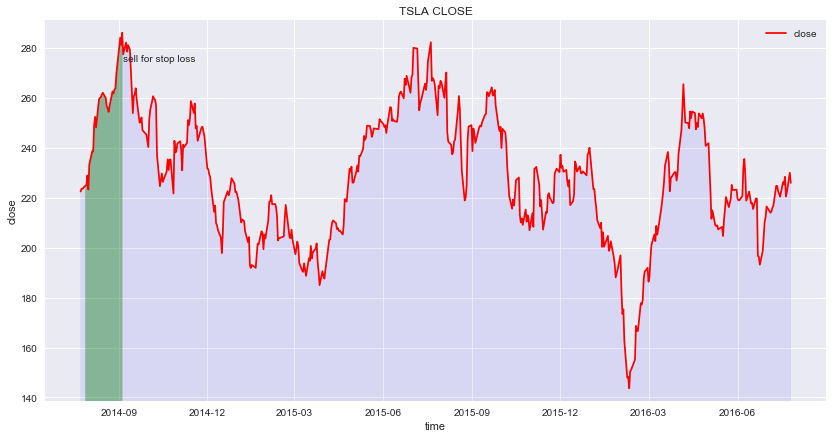

In [30]:
plot_trade_with_annotate('2014-07-28', '2014-09-05',
                         'sell for stop loss')

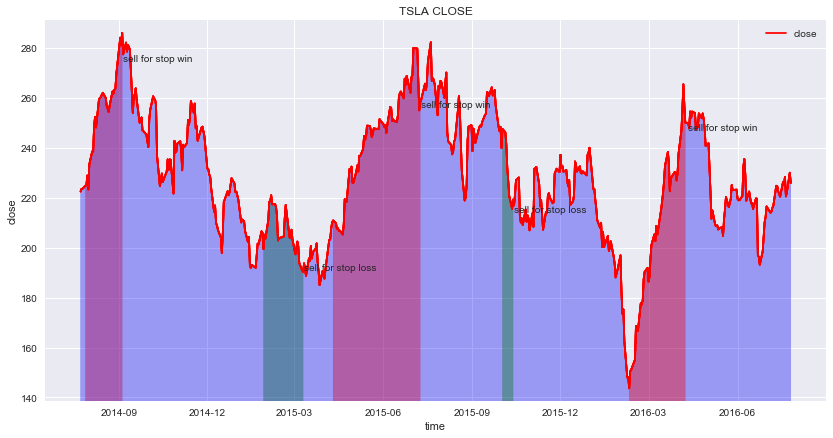

In [31]:
def plot_trade(buy_date, sell_date):
    # 找出2014-07-28对应时间序列中的index作为start
    start = tsla_df[tsla_df.index == buy_date].key.values[0]
    # 找出2014-09-05对应时间序列中的index作为end
    end = tsla_df[tsla_df.index == sell_date].key.values[0]
    # 使用5.1.1封装的绘制tsla收盘价格时间序列函数plot_demo
    # just_series＝True, 即只绘制一条曲线使用series数据
    plot_demo(just_series=True)
    # 将整个时间序列都填充一个底色blue，注意透明度alpha=0.08是为了
    # 之后标注其他区间透明度高于0.08就可以清楚显示
    plt.fill_between(tsla_df.index, 0, tsla_df['close'], color='blue',
                     alpha=.08)
    # 标注股票持有周期绿色，使用start和end切片周期，透明度alpha=0.38 > 0.08
    if tsla_df['close'][end] < tsla_df['close'][start]:
        # 如果赔钱了显示绿色
        plt.fill_between(tsla_df.index[start:end], 0,
                         tsla_df['close'][start:end], color='green',
                         alpha=.38)
        is_win = False
    else:
        # 如果挣钱了显示红色
        plt.fill_between(tsla_df.index[start:end], 0,
                         tsla_df['close'][start:end], color='red',
                         alpha=.38)
        is_win = True

    # 设置y轴的显示范围，如果不设置ylim，将从0开始作为起点显示
    plt.ylim(np.min(tsla_df['close']) - 5,
             np.max(tsla_df['close']) + 5)
    # 使用loc='best'
    plt.legend(['close'], loc='best')
    # 将是否盈利结果返回
    return is_win


def plot_trade_with_annotate(buy_date, sell_date):
    """
    :param buy_date: 交易买入日期
    :param sell_date: 交易卖出日期
    :return:
    """
    # 标注交易区间buy_date到sell_date
    is_win = plot_trade(buy_date, sell_date)
    # 根据is_win来判断是否显示止盈还是止损卖出
    plt.annotate(
        'sell for stop win' if is_win else 'sell for stop loss',
        xy=(sell_date, tsla_df['close'].asof(sell_date)),
        arrowprops=dict(facecolor='yellow'),
        horizontalalignment='left', verticalalignment='top')

# 区间2014-07-28到2014-09-05
plot_trade_with_annotate('2014-07-28', '2014-09-05')
# 区间2015-01-28到2015-03-11
plot_trade_with_annotate('2015-01-28', '2015-03-11')
# 区间2015-04-10到2015-07-10
plot_trade_with_annotate('2015-04-10', '2015-07-10')
# 区间2015-10-2到2015-10-14
plot_trade_with_annotate('2015-10-2', '2015-10-14')
# 区间2016-02-10到2016-04-11
plot_trade_with_annotate('2016-02-10', '2016-04-11')

## 5.6 实例2:标准化两个股票的观察周期

In [32]:
goog_df = ABuSymbolPd.make_kl_df('usGOOG', n_folds=2)
# mean:打印均值，median：打印中位数
print(round(goog_df.close.mean(), 2), round(goog_df.close.median(), 2))
# 表5-3所示
goog_df.tail()

624.28 599.25


,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2016-07-20,741.19,742.13,737.10,0.57,737.33,736.96,1289671,20160720,2,499,14.070107,13.671520
2016-07-21,738.63,741.69,735.83,-0.35,740.36,741.19,1026306,20160721,3,500,13.679149,13.113554
2016-07-22,742.74,743.24,736.56,0.56,741.86,738.63,1259823,20160722,4,501,13.345856,12.654015
2016-07-25,739.77,742.61,737.50,-0.40,740.67,742.74,1032432,20160725,0,502,12.953673,12.115156
2016-07-26,740.92,741.53,736.56,0.16,738.49,739.77,7600,20160726,1,503,12.631117,11.691217


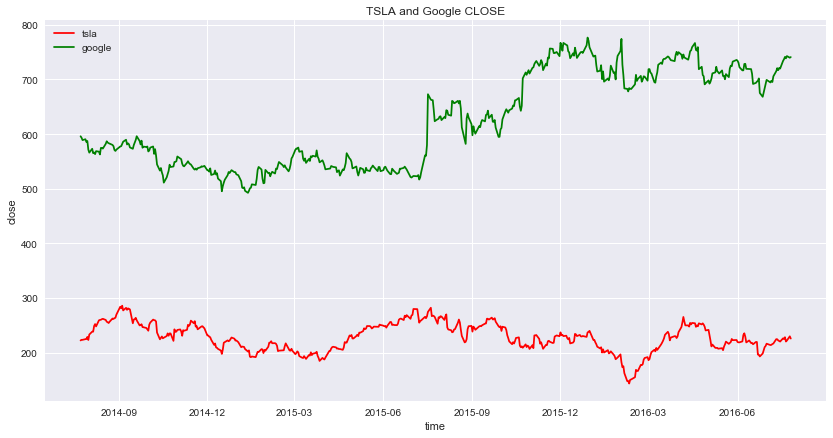

In [33]:
def plot_two_stock(tsla, goog, axs=None):
    # 如果有传递子画布，使用子画布，否则plt
    drawer = plt if axs is None else axs
    # tsla red
    drawer.plot(tsla, c='r')
    # google greeen
    drawer.plot(goog, c='g')
    # 显示网格
    drawer.grid(True)
    # 图例标注
    drawer.legend(['tsla', 'google'], loc='best')


plot_two_stock(tsla_df.close, goog_df.close)
plt.title('TSLA and Google CLOSE')
# x轴时间
plt.xlabel('time')
# y轴收盘价格
plt.ylabel('close')

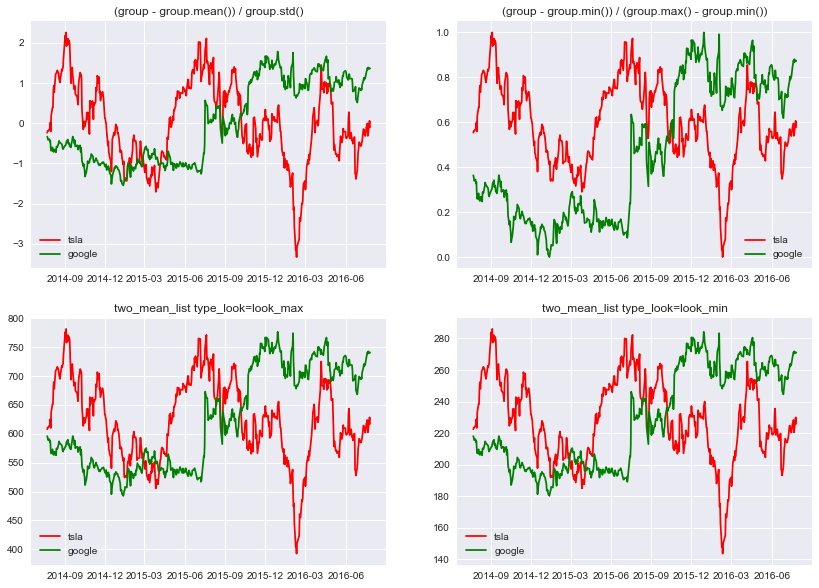

In [34]:
def two_mean_list(one, two, type_look='look_max'):
    """
    只针对俩个输入的均值归一化
    :param one:
    :param two:
    :param type_look:
    :return:
    """
    one_mean = one.mean()
    two_mean = two.mean()
    if type_look == 'look_max':
        """
            向较大的均值序列看齐
        """
        one, two = (one, one_mean / two_mean * two) \
            if one_mean > two_mean else (
            one * two_mean / one_mean, two)
    elif type_look == 'look_min':
        """
            向较小的均值序列看齐
        """
        one, two = (one * two_mean / one_mean, two) \
            if one_mean > two_mean else (
            one, two * one_mean / two_mean)
    return one, two

def regular_std(group):
    # z-score规范化也称零-均值规范化
    return (group - group.mean()) / group.std()

def regular_mm(group):
    # 最小-最大规范化
    return (group - group.min()) / (group.max() - group.min())

# 2行2列，4个画布
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# 第一个regular_std, 如图5-16左上所示
drawer = axs[0][0]
plot_two_stock(regular_std(tsla_df.close), regular_std(goog_df.close),
               drawer)
drawer.set_title('(group - group.mean()) / group.std()')

# 第二个regular_mm，如图5-16右上所示
drawer = axs[0][1]
plot_two_stock(regular_mm(tsla_df.close), regular_mm(goog_df.close),
               drawer)
drawer.set_title(
    '(group - group.min()) / (group.max() - group.min())')

# 第三个向较大的序列看齐，如图5-16左上所示
drawer = axs[1][0]
one, two = two_mean_list(tsla_df.close, goog_df.close,
                         type_look='look_max')
plot_two_stock(one, two, drawer)
drawer.set_title('two_mean_list type_look=look_max')

# 第四个向较小的序列看齐，如图5-16右下所示
drawer = axs[1][1]
one, two = two_mean_list(tsla_df.close, goog_df.close,
                         type_look='look_min')
plot_two_stock(one, two, drawer)
drawer.set_title('two_mean_list type_look=look_min')

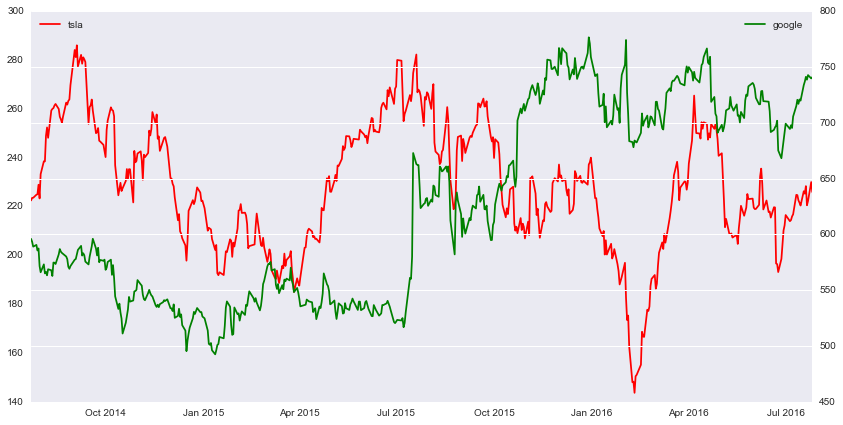

In [45]:
_, ax1 = plt.subplots()
ax1.plot(tsla_df.close, c='r', label='tsla')
# 第一个ax的标注
ax1.legend(loc=2)
ax1.grid(False)
# 反向y轴 twinx
ax2 = ax1.twinx()
ax2.plot(goog_df.close, c='g', label='google')
# 第二个ax的标志
ax2.legend(loc=1)

## 5.7 综合实例3:黄金分割线

### 5.7.1 黄金分割线的定义方式

In [35]:
# 收盘价格序列中的最大值
cs_max = tsla_df.close.max()
# 收盘价格序列中的最小值
cs_min = tsla_df.close.min()

sp382 = (cs_max - cs_min) * 0.382 + cs_min
sp618 = (cs_max - cs_min) * 0.618 + cs_min
print('视觉上的382: ' + str(round(sp382, 2)))
print('视觉上的618: ' + str(round(sp618, 2)))

视觉上的382: 198.06
视觉上的618: 231.65


In [41]:
demo_list = [1, 1, 1, 100, 100, 100, 100, 100, 100, 100]

In [37]:
# sort is deprecated
# pd.Series(demo_list).sort(inplace=False)
pd.Series(demo_list).sort_values(inplace=False)

0      1
1      1
2      1
3    100
4    100
5    100
6    100
7    100
8    100
9    100
dtype: int64

In [42]:
from scipy import stats
stats.scoreatpercentile(demo_list, 38.2)

100.0

In [43]:
demo_list = np.linspace(1, 1000, 1000)
stats.scoreatpercentile(demo_list, 38.2)

382.61799999999999

In [45]:
from scipy import stats

sp382_stats = stats.scoreatpercentile(tsla_df.close, 38.2)
sp618_stats = stats.scoreatpercentile(tsla_df.close, 61.8)

print('统计上的382: ' + str(round(sp382_stats, 2)))
print('统计上的618: ' + str(round(sp618_stats, 2)))

统计上的382: 219.62
统计上的618: 237.56


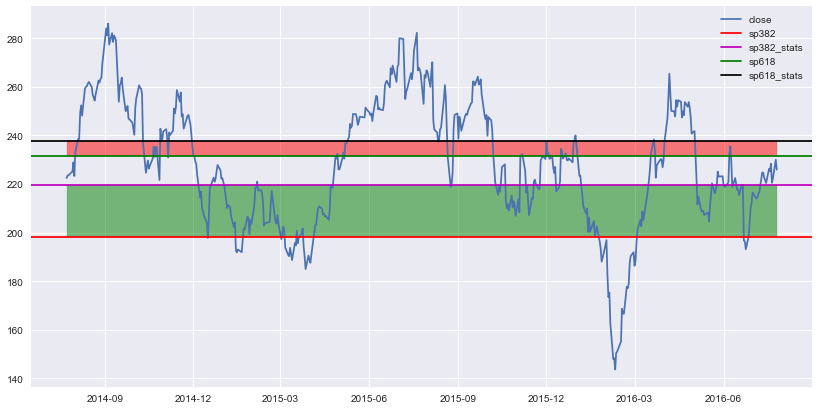

In [46]:
from collections import namedtuple


def plot_golden():
    # 从视觉618和统计618中筛选更大的值
    above618 = np.maximum(sp618, sp618_stats)
    # 从视觉618和统计618中筛选更小的值
    below618 = np.minimum(sp618, sp618_stats)
    # 从视觉382和统计382中筛选更大的值
    above382 = np.maximum(sp382, sp382_stats)
    # 从视觉382和统计382中筛选更小的值
    below382 = np.minimum(sp382, sp382_stats)
    
    # 绘制收盘价
    plt.plot(tsla_df.close)
    # 水平线视觉382
    plt.axhline(sp382, c='r')
    # 水平线统计382
    plt.axhline(sp382_stats, c='m')
    # 水平线视觉618
    plt.axhline(sp618, c='g')
    # 水平线统计618
    plt.axhline(sp618_stats, c='k')

    # 填充618 red
    plt.fill_between(tsla_df.index, above618, below618,
                     alpha=0.5, color="r")
    # 填充382 green
    plt.fill_between(tsla_df.index, above382, below382,
                     alpha=0.5, color="g")

    # 最后使用namedtuple包装上，方便获取
    return namedtuple('golden', ['above618', 'below618', 'above382',
                                 'below382'])(
        above618, below618, above382, below382)

golden = plot_golden()
# 根据绘制顺序标注名称
plt.legend(['close', 'sp382', 'sp382_stats', 'sp618', 'sp618_stats'],
           loc='best')

In [47]:
print('理论上的最高盈利: {}'.format(golden.above618 - golden.below382))

理论上的最高盈利: 39.50254000000001


### 5.7.2 多维数据绘制示例

In [48]:
from itertools import product

buy_rate = [0.20, 0.25, 0.30]
sell_rate = [0.70, 0.80, 0.90]


def find_percent_point(percent, y_org, want_max):
    """
    :param percent: 比例
    :param y_org: close价格序列
    :param want_max: 是否返回大的值
    :return:
    """
    cs_max = y_org.max()
    cs_min = y_org.min()

    # 如果参数want_max为真 就使用np.maximum()函数否则使用np.minimum()函数
    maxmin_mum = np.maximum if want_max else np.minimum
    # 每次都计算统计上和视觉上，根据want_max返回大的值above，或小的值below
    return maxmin_mum(
        # 统计上的计算
        stats.scoreatpercentile(y_org, np.round(percent * 100, 1)),
        # 视觉上的计算
        (cs_max - cs_min) * percent + cs_min)


# 存储结果list
result = []
# 先将0.382, 0.618这一组放入结果队列中
result.append(
    (0.382, 0.618, round(golden.above618 - golden.below382, 2)))

# 将buy_rate和sell_rate做笛卡尔积排列各种组合
for (buy, sell) in product(buy_rate, sell_rate):
    # 如果参数want_max为False，find_percent_point输出结果即为理论上最低盈利值
    buy_price_below = find_percent_point(buy, tsla_df.close, False)
    # 如果参数want_max为True，find_percent_point输出结果即为理论上最高盈利值
    buy_price_above = find_percent_point(sell, tsla_df.close, True)
    # 最终将买入比例，卖出比例，理论最高盈利append
    result.append((buy, sell,
                   round(buy_price_above - buy_price_below, 2)))
# 最后将result作为参数来实例化numpy.array
result = np.array(result)
result

array([[  0.382,   0.618,  39.5  ],
       [  0.2  ,   0.7  ,  73.99 ],
       [  0.2  ,   0.8  ,  85.42 ],
       [  0.2  ,   0.9  ,  99.66 ],
       [  0.25 ,   0.7  ,  66.87 ],
       [  0.25 ,   0.8  ,  78.3  ],
       [  0.25 ,   0.9  ,  92.54 ],
       [  0.3  ,   0.7  ,  59.75 ],
       [  0.3  ,   0.8  ,  71.19 ],
       [  0.3  ,   0.9  ,  85.42 ]])

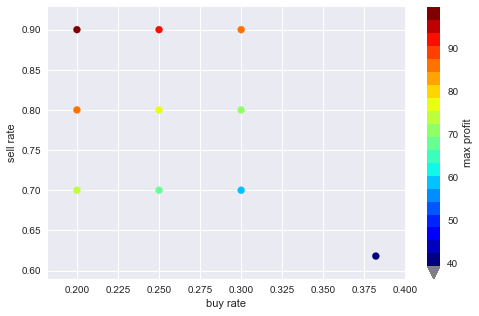

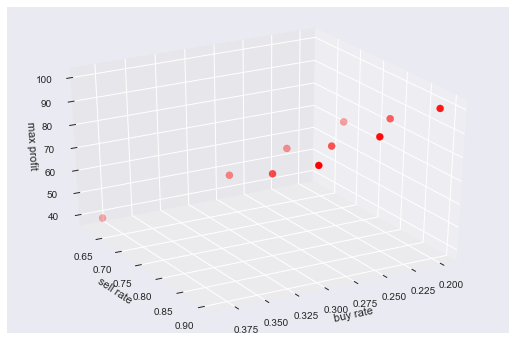

In [49]:
# 1. 通过scatter点图
cmap = plt.get_cmap('jet', 20)
cmap.set_under('gray')
fig, ax = plt.subplots(figsize=(8, 5))
# scatter点图，result[:, 0]:x，result[:, 1]:y, result[:, 2]:c
cax = ax.scatter(result[:, 0], result[:, 1], c=result[:, 2],
                 cmap=cmap, vmin=np.min(result[:, 2]),
                 vmax=np.max(result[:, 2]))
fig.colorbar(cax, label='max profit', extend='min')
plt.grid(True)
plt.xlabel('buy rate')
plt.ylabel('sell rate')
plt.show()

# 2. 通过mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
ax.view_init(30, 60)
ax.scatter3D(result[:, 0], result[:, 1], result[:, 2], c='r', s=50,
             cmap='spring')
ax.set_xlabel('buy rate')
ax.set_ylabel('sell rate')
ax.set_zlabel('max profit')
plt.show()

## 5.8 技术指标的可视化

### 5.8.1 MACD指标的可视化

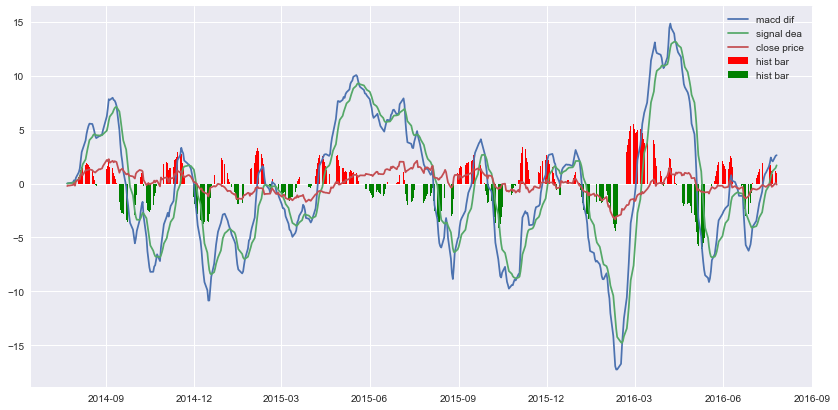

In [5]:
from abupy import nd
nd.macd.plot_macd_from_klpd(tsla_df)

### 5.8.2 ATR指标的可视化

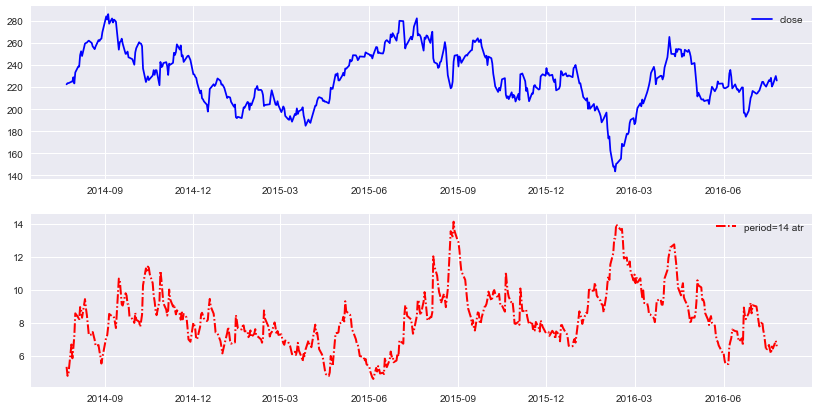

In [6]:
from abupy import nd
nd.atr.plot_atr_from_klpd(tsla_df)